# Task 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing Libaries and Data
#### 2. Data Cleaning
#### 3. Elbow Technique
#### 4. K-Means Clustering
#### 5. Calculating Descriptive Statistics
#### 6. Exporting Data

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [11]:
# import data
df = pd.read_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.4_Regression_Homeless_Ages_40-59.csv', index_col=False)

In [12]:
df

,Unnamed: 0,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters
0,2,Homeless,Age,40 to 59,147,288
1,6,Homeless,Age,40 to 59,379,846
2,10,Homeless,Age,40 to 59,0,63
3,14,Homeless,Age,40 to 59,18,52
4,18,Homeless,Age,40 to 59,1818,4138
...,...,...,...,...,...,...
729,24577,Homeless,Age,40 to 59,1,6
730,24766,Homeless,Age,40 to 59,52,96
731,24920,Homeless,Age,40 to 59,2,4
732,25129,Homeless,Age,40 to 59,29,64


NOTE:  
- **Encounters** = the homeless encounters for the age 40-59 demographic value.  
- **Total Encounters** are the total homeless encounters for all age groups. 

In [13]:
# removing categorical variables or unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'HomelessIndicator', 'Demographic','DemographicValue'])

In [14]:
df.dtypes

Encounters         int64
TotalEncounters    int64
dtype: object

# 2. Data Cleaning

Note: 

This dataset was cleaned and filtered in prior scripts. No action needed to check duplicates, missing values, or extreme values, etc.  

# 3. Elbow Technique

In [15]:
# define the potential clusters in the data
num_cl = range(1,10)
# define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [16]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4652220713.346045,
 -1978501453.7642176,
 -852337936.2115502,
 -531805314.43168944,
 -306794320.3414536,
 -204572021.376183,
 -144298075.06958118,
 -105524574.6273074,
 -83863185.02895562]

Text(0.5, 1.0, 'Elbow Curve')

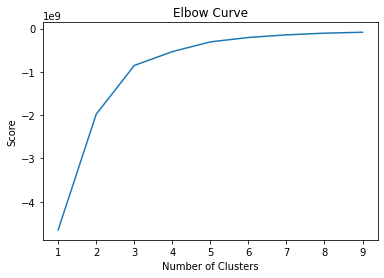

In [17]:
# plot the elbow curve using Pylab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

I decided to use 3 because after that the slope tends to lessen.  I tried it with 2 but it seemed like the data was too condensed and I might have been missing some clusters, and anymore than 3 was too many clusters that it hid the groups. 

# 4. K-Means Clustering

In [20]:
# create the k-means object
kmeans = KMeans(n_clusters = 3)

In [21]:
# fit the k-means to the data
kmeans.fit(df)

KMeans(n_clusters=3)

In [22]:
# creating a column for the assigned clusters
df['clusters'] = kmeans.fit_predict(df)

In [23]:
df.head()

,Encounters,TotalEncounters,clusters
0,147,288,0
1,379,846,0
2,0,63,0
3,18,52,0
4,1818,4138,2


In [24]:
# checking the value counts of each cluster
df['clusters'].value_counts()

0    630
2     94
1     10
Name: clusters, dtype: int64

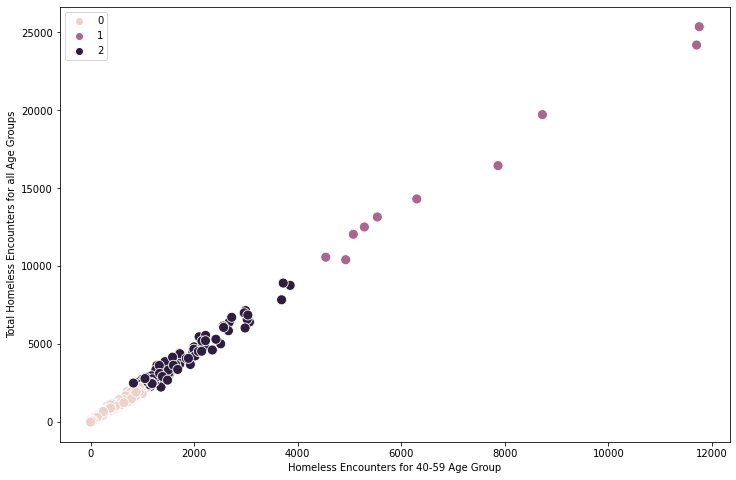

In [25]:
# plot the clusters for the Homeless Encounter vs. Total Encounter variables
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df['Encounters'], y=df['TotalEncounters'], hue = kmeans.labels_, s=100)
# subsetting the 'X' for the x and y arguements to avoid using their labels.
# hue takes the value of the attribute 'kmeans.labels_', which is the result of running the kmeans algorithm
# 's' represents the size of the points you want to add in the plot.

ax.grid(False) # Removes the grid from the background
plt.xlabel('Homeless Encounters for 40-59 Age Group')
plt.ylabel('Total Homeless Encounters for all Age Groups')
plt.show()

Results:  

1.  In general, this dataset was not a great dataset to do k-means on as there were so few variables to test and cluster.  
2. After seeing the elbow curve and looking at the k-means graphs, it appears that there are some clusters that are not well seen.  I believe this is due in part because of the lack of additional variables to use with clustering as well as not having the data standardized. There is a very large range for both Total Encounters and Homeless Encounters.  

# 5. Calculating Descriptive Statistics

In [28]:
# creating groups for cluster colors
df.loc[df['clusters'] == 2, 'cluster_color'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster_color'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster_color'] = 'pink'

In [30]:
# grouping and aggregating colors to get descriptive statistics. 
df.groupby('cluster_color').agg({'Encounters':['mean', 'median'],
             'TotalEncounters':['mean', 'median']})


Encounters         TotalEncounters         
                      mean  median            mean   median
cluster_color                                              
dark purple    1765.978723  1562.5     4043.180851   3639.0
pink            253.423810   172.0      565.971429    375.5
purple         7173.500000  5920.0    15876.500000  13736.5

Results: Through these descriptive statistics we can see there are some outliers with each group, as the median is smaller than the mean.  The mean is more sensitive to outliers. 

With such a small dataset it is challenging to see different clusters and really derive meaning from these statistics as part of the encounters encompasses the total encounters.  We have three distinct groups within the Encounters of the 40-59 Age Group.  

More research is needed to find out what those clusters are.  Since there are so many categorical variables in this dataset, it is recommended to break down the categorical data into dummy variables to see if you could find out more about the clusters.  For example are these clusters related to gender, race, payer type?  

# 6. Exporting Data

In [31]:
df.to_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.5_Homeless_Unsupervised_ML_Clustering.csv')